$\rule{800pt}{20pt}$

In [ ]:
# Instructions
<br>
<font size="+1">
    <ul>
        <li><b>Recommended Steps</b></li>
        <br>
        <ol>
            <li>Read the prompt and summarize the task in your own words, using as few words as possible for ease of comprehension.</li>
            <br>
            <li>Pretend to be the computer program that you are trying to create. Examine the smaple inputs and manually produce the appropriate results. Afterward, verify the correctness of your logic by comparing with the given sample outputs.</li>
            <br>
            <li>On a scrap piece of paper, write step-by-step instructions so that someone else can pretend to be the computer program and produce the appropriate results for any possible inputs. These instructions should target a human audience who does not know the problem description and only has your instructions as a guide. These instructions should serve as the roadmap for your code.</li>
            <br>
            <li>On another scrap piece of paper, write fragments of Python code to implement each step in your roadmap, focusing especially on the trickiest parts of the logic.</li>
            <br>
            <li>With your roadmap and code fragments from the previous steps, type Python code into a new Jupyter notebook cel to solve the given problem. You should type incrementally and run the code whenever you add a small chunk. This allows you to correct errors as they occur. It may also be helpful to print intermediate results to verify that the code is carrying out the logic as desired.</li>
            <br>
            <li>Run your code with some sample inputs and verify that the outputs are exactly the same as the sample outputs.</li>
            <br>
            <li>Once all of your problems are finished, it is useful to click <i>Kernel</i> $\rightarrow$ <i>Restart & Run All</i> to verify that your outputs for all of your problems continue to be correct. This helps to ensure that someone else will be able to replicate your results when running your notebook.</li>
            <br>
            <font color="red"><li style="color:red">Submit the <i>.ipynb</i> file on TurnItIn on Blackboard by the deadline. Be sure to refresh the page and double check your submission actually went through. <b>Note that you only need to submit your solutions, not all of the other recommended steps.</b> The recommended steps are meant to serve as a guide for your thinking process.</li></font>
            <br>
            <ul style="color:red">
            <font color="red"><li>Do your best to make sure that I will be able to run it.</li>
        <br>
        <li>For example, read in the CSV files from the current directory. I.e., do not write the full path of the file in your code. That will allow me to run your notebook in any directory on my own PC.</li>
        <br>
        <li>Please use Text/Markdown cells to help me understand what you are doing. (I know it may be obvious, but I want to see that you know how to use Text/Markdown.)</li>
        <br>
        <li><b>Some of the questions may be vague, you can either ask me for clarification, or clearly explain your interpretation to the question and your solution to your interpretation</b>. Remember, an important part of being a data scientist is communication and soft skills, so take this as an opportunity to exercise those skills.</li></font>
        <br>
            </ul>
        </ol>
        <br>
        $\rule{800pt}{10pt}$
        <br>
        <li><b>Grading</b></li>
        <br>
        <li>There are four possible scores you can get from submitting this assignment on time (submitting a blank file or one without any apparent effort does not count). Note that the rubric is designed to incentivize you to go for $100%$ mastery of the material, as the little details matter in programming.</li>
        <br>
        <ul>
            <li>Grade of $5$ out of $5$ - perfect submission with no significant errors</li>
            <br>
            <li>Grade of $4$ out of $5$ - near perfect submission with one or more significant errors</li>
            <br>
            <li>Grade of $2$ out of $5$ - apparent effort but far from perfect</li>
            <br>
            <li>Grade of $0$ out of $5$ - no submission or no apparent effort</li>
            <br>
        </ul>
    </ul>
</font>

$\square$

$\rule{800pt}{20pt}$

# Before You Begin
<br>
<font size="+1">
    <ul>
        <li>Please read the in-class notebooks realted to complexity in return prediction and building dense neural networks.</li>
        <br>
        <font color="red"><li><b>NOTE THAT THIS HOMEWORK ASSIGNMENT IS MORE CHALLENGING AND MORE VAUGE COMPARED TO OTHERS.</b></li></font>
        <br>
        <ul>
          <font color="red"><li><b>Simply try your best on the assignment, it is intended for you to learn in a somewhat unstructured setting where you can experiment with the concepts we have developed in class.</li></font>
          <br>
        </ul>
    </ul>
</font>

$\rule{800pt}{20pt}$

# Imports

In [1]:
import os
import os.path
import time
from datetime import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import cvxpy as cp

tf.keras.utils.set_random_seed(42)

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
os.getcwd()

'/content'

In [3]:
images_path = '/content/drive/My Drive/DSO_464_Spring_2024/Images'

data_path = '/content/drive/My Drive/DSO_464_Spring_2024/05_Neural_Networks_for_Structured_Data_Dense_NNs_I_EX_Complexity_in_Stock_Returns_Predictions_for_Asset_and_Wealth_Management_and_Trading/Data'

In [4]:
# tf.keras.preprocessing.image.load_img(os.path.join(images_path, 'add_any_images_using_this_code.png'))

$\rule{800pt}{20pt}$

# Cleaning Market Voaltility Data
<br>
<font size="+1">
  <ul>
    <li>In this exercise, you are to predict monthly S\&P 500 stock market <b>volatility</b> rather than <b>returns</b> (as we did in class).</li>
    <br>
  </ul>
</font>

$\square$

## Data
<br>
<font size="+1">
    <ul>
        <li><b>The forecast target is the monthly rolling standard deviation of the CRSP (Center for Research in Security Prices) S&P 500 value-weighted index, otherwise known as the volatility.</b></li>
        <br>
        <li>The features consist of 15 variables that are known to predict the stock market returns over time. They are fairly well known both in industry and in academia, and they were compiled by Goyal and Welch (2008).</li>
        <br>
        <li>The data sample ranges from 1926 to 2020.</li>
        <br>
        <li><details><summary>The following is a description of the variables from the 2008 Goyal & Welch paper.</summary>
        <br>
        <li>Variables used to construct the target variable.</li>
        <br>
        <ul>
          <li><b>Stock Returns:</b> We use S&P 500 index returns from 1926 to 2005 from Center for Research in Security Prices (CRSP) month-end values. Stock returns are the continuously compounded returns on the S&P 500 index, including dividends. For yearly and longer data frequencies, we can go back as far as 1871, using data from Robert Shiller's website. For monthly frequency, we can only begin in the CRSP period, that is, 1927.</li>
          <br>
          <li><b>Risk-free Rate:</b> The risk-free rate from 1920 to 2005 is the Treasury-bill rate. Treasury bills (or T-bills) are U.S. debt securities that mature over a time period of four weeks to one year. The most common terms for T-bills are for four, eight, 13, 17, 26 and 52 weeks. Because there was no risk-free short-term debt prior to the 1920s, we had to estimate it. Commercial paper rates for New York City are from the National Bureau of Economic Research (NBER) Macrohistory database. These are available from 1871 to 1970. We estimated a regression from 1920 to 1971, which yielded $$\text{Treasury-bill rate} = -0.004 + 0.886 \times \text{Commercial Paper Rate},$$ with an $R^2$ of $95.7\%$. Therefore, we <b>instrumented</b> the risk-free rate from 1871 to 1919 with the predicted regression equation. The correlation for the period 1920 to 1971 between the equity premium computed using the actual Treasury-bill rate and that computed using the predicted Treasury-bill rate (using the commercial paper rate) is $99.8\%$.</li>
          <br>
          <li>The equity premium had a mean (standard deviation) of $4.85\% (17.79%)$ over the entire sample from 1872 to 2005; $6.04\% (19.17\%)$ from 1927 to 2005; and $4.03\% (15.70\%)$ from 1965 to 2005.</li>
          <br>
        </ul>
        <li>Our first set of independent variables are primarily stock characteristics.</li>
        <br>
        <ul>
          <li><b>Dividends:</b> Dividends are 12-month moving sums of dividends paid on the S&P 500 index. The data are from Robert Shiller's website from 1871 to 1987. Dividends from 1988 to 2005 are from the S&P Corporation. The <b>Dividend Price Ratio (d/p)</b> is the difference between the log of dividends and the log of prices. The <b>Dividend Yield (d/y)</b> is the difference between the log of dividends and the log of lagged prices. (<i>See, e.g., Ball (1978), Campbell (1987), Campbell and Shiller (1988a, 1988b), Campbell and Viceira (2002), Campbell and Yogo (2006), the survey in Cochrane (1997), Fama and French (1988), Hodrick (1992), Lewellen (2004), Menzly, Santos, and Veronesi (2004), Rozeff (1984), and Shiller (1984).</i>)</li>
          <br>
          <li><b>Earnings:</b> Earnings are 12-month moving sums of earnings on the S&P 500 index. The data are again from Robert Shiller's website from 1871 to 1987. Earnings from 1988 to 2005 are our own estimates based on 1457 interpolation of quarterly earnings provided by the S&P Corporation. The <b>Earnings Price Ratio (e/p)</b> is the difference between the log of earnings and the log of prices. (We also consider variations, in which we explore multiyear moving averages of numerator or denominator, e.g., as in e10/p, which is the moving ten-year average of earnings divided by price.) The <b>Dividend Payout Ratio (d/e)</b> is the difference between the log of dividends and the log of earnings. (<i>See, e.g., Campbell and Shiller (1988a, 1998) and Lamont (1998).</i>)</li>
          <br>
          <li><b>Stock Variance (svar):</b> Stock Variance is computed as sum of squared daily returns on the S&P 500. G. William Schwert provided daily returns from 1871 to 1926; data from 1926 to 2005 are from CRSP. (<i>See Guo (2006).</i>)</li>
          <br>
          <li><b>Cross-Sectional Premium (csp):</b> The cross-sectional beta premium measures the relative valuations of high- and low-beta stocks and is proposed in Polk, Thompson, and Vuolteenaho (2006). The csp data are from Samuel Thompson from May 1937 to December 2002.</li>
          <br>
          <li>Book Value : Book values from 1920 to 2005 are from Value Line's website, specifically their Long-Term Perspective Chart of the Dow Jones Industrial Average. The <b>Book-to-Market Ratio (b/m)</b> is the ratio of book value to market value for the Dow Jones Industrial Average. For the months from March to December, this is computed by dividing book value at the end of the previous year by the price at the end of the current month. For the months of January and February, this is computed by dividing book value at the end of two years ago by the price at the end of the current month. (<i>See, e.g, Kothari and Shanken (1997) and Pontiff and Schall (1998).</i>)</li>
          <br>
          <li><b>Corporate Issuing Activity:</b> We entertain two measures osf corporate issuing activity. <b>Net Equity Expansion (ntis)</b> is the ratio of 12-month moving sums of net issues by NYSE listed stocks divided by the total end-of-year market capitalization of NYSE stocks. This dollar amount of net equity issuing activity (IPOs, SEOs, stock repurchases, less dividends) for NYSE listed stocks is computed from CRSP data as $$\text{Net Issue}_t = \text{Mcap}_t - \text{Mcap}_{t - 1} \times (1 + \text{vwretx}_t) ,$$ where Mcap is the total market capitalization, and vwretx is the value weighted return (excluding dividends) on the NYSE index. These data are available from 1926 to 2005. ntis is closely related, but not identical, to a variable proposed in Boudoukh, Michaely, Richardson, and Roberts (2007). The second measure, <b>Percent Equity Issuing (eqis)</b>, is the ratio of equity issuing activity as a fraction of total issuing activity. This is the variable proposed in Baker and Wurgler (2000). The authors provided us with the data, except for 2005, which we added ourselves. This calculation implicitly assumes that the delisting return is -100 percent. Using the actual delisting return, where available, or ignoring delistings altogether, has no impact on our results. The first equity issuing measure is relative to aggregate market cap, while the second is relative to aggregate corporate issuing.</li>
          <br>
        </ul>
        <li>Our next set of independent variables is interest-rate related.</li>
        <br>
        <ul>
          <li><b>Treasury Bills (tbl):</b> Treasury-bill rates from 1920 to 1933 are the U.S. Yields On Short-Term United States Securities, Three-Six Month Treasury Notes and Certificates, ThreeMonth Treasury series in the NBER Macrohistory data base. Treasury-bill rates from 1934 to 2005 are the 3-Month Treasury Bill: SecondaryMarket Rate from the economic research data base at the Federal Reserve Bank at St. Louis (FRED). (<i>See, e.g., Campbell (1987) and Hodrick (1992).</i>)</li>
          <br>
          <li><b>Long Term Yield (lty):</b> Our long-term government bond yield data from 1919 to 1925 is the U.S. Yield On Long-Term United States Bonds series in the NBER's Macrohistory data base. Yields from 1926 to 2005 are from Ibbotson's Stocks, Bonds, Bills and Inflation Yearbook, the same source that provided the <b>Long Term Rate of Returns (ltr)</b>. The <b>Term Spread (tms)</b> is the difference between the long term yield on government bonds and the Treasury-bill. (<i>See, e.g., Campbell (1987) and Fama and French (1989).</i>)</li>
          <br>
          <li><b>Corporate Bond Returns:</b> Long-term corporate bond returns from 1926 to 2005 are again from Ibbotson's Stocks, Bonds, Bills and Inflation Yearbook. Corporate Bond Yields on AAA and BAA-rated bonds from 1919 to 2005 are from FRED. The <b>Default Yield Spread (dfy)</b> is the difference between BAA and AAA-rated corporate bond yields. The <b>Default Return Spread (dfr)</b> is the difference between long-term corporate bond and long-term government bond returns. (<i>See, e.g., Fama and French (1989) and Keim and Stambaugh (1986).</i>)</li>
          <br>
          <li><b>Inflation (infl):</b> Inflation is the Consumer Price Index (All Urban Consumers) from 1919 to 2005 from the Bureau of Labor Statistics. Because inflation information is released only in the following month, we wait for one month before using it in our monthly regressions. <i>See, e.g., Campbell and Vuolteenaho (2004), Fama (1981), Fama and Schwert (1977), and Lintner (1975).</i>)</li>
          <br>
        </ul>
        <li>Like inflation, our next variable is also a common broad macroeconomic indicator.</li>
        <br>
        <ul>
          <li><b>Investment to Capital Ratio (i/k):</b> The investment to capital ratio is the ratio of aggregate (private nonresidential fixed) investment to aggregate capital for the whole economy. This is the variable proposed in Cochrane (1991). John Cochrane kindly provided us with updated data. Of course, many articles explore multiple variables. For example, Ang and Bekaert (2003) explore both interest rate and dividend related variables. In addition to simple univariate prediction models, we also entertain two methods that rely on multiple variables (all and ms), and two models that are rolling in their independent variable construction (cay and ms).</li>
          <br>
        </ul>
</li></details></li>
        <br>
        </ul>
    </ul>
</font>

$\square$

In [5]:
DSO_464_Spring_2024# CRSP_SPvw includes dividends
# CRSP_SPvwx excluding dividends

# Note: Rapach, Zhou, Strauss calculate the equity premium using CRSP_SPvw (includes dividends) and lagged risk free rate
# Note: Goyal, Welch (2008) use Index and D12 and current risk free rate (not sure if they use lagged risk free rate or "current")

# This data list includes:
# b/m (book to market ratio),
# de (dividend payout ratio),
# dfr (default return spread; used to measure corporate bond returns relative to government bond returns),
# dfy (default yield spread; difference between BAA and AAA-rated corporate bond yields),
# dp (dividend price ratio),
# dy (dividend yield),
# ep (earnings price ratio),
# infl (inflation measured through the consumer price inded CPI),
# ltr (long-term bond rate of returns),
# lty (long-term bond yield),
# ntis (net equity expansion; a measure of corporate issuing activity),
# svar (stock variance),
# tbl (treasury bills),
# tms (term-spread),
# as well as one lag of the market return



COLUMNS = ["b/m", "de", "dfr", "dfy", "dp", "dy", "ep", "infl", "ltr", "lty", "ntis", "svar", "tbl", "tms", "returns_lag_1", "volatility_lag_1", "volatility"]


def load_nber(data_path, file_name):
    """Used to create a data set that you can use to investigate trends around recessions and other business cycles."""
    nber = pd.read_csv(os.path.join(data_path, file_name))[1:]
    nber["peak"] = pd.to_datetime(nber["peak"])
    nber["trough"] = pd.to_datetime(nber["trough"])
    return nber

def load_data(data_path, file_name):
    data_raw = pd.read_csv(os.path.join(data_path, file_name))
    data_raw["yyyymm"] = pd.to_datetime(data_raw["yyyymm"], format='%Y%m', errors='coerce')
    data_raw["Index"] = data_raw["Index"].str.replace(",", "")
    data_raw.set_index("yyyymm", inplace=True)
    data_raw[data_raw.columns] = data_raw[data_raw.columns].astype(float)
    data_raw.rename(columns={"Index":"prices"}, inplace=True)

    # Calculate missing columns according to the explaination in m Welch and Goyal (2008)
    data_raw["dfy"] = data_raw["BAA"] - data_raw["AAA"]
    data_raw["tms"] = data_raw["lty"] - data_raw["tbl"]
    data_raw["de"] = np.log(data_raw["D12"]) - np.log(data_raw["E12"])
    data_raw["dfr"] = data_raw["corpr"] - data_raw["ltr"]
    data_raw["lag_prices"] = data_raw["prices"].shift()
    data_raw["dp"] = np.log(data_raw["D12"]) - np.log(data_raw["prices"])
    data_raw["dy"] = np.log(data_raw["D12"]) - np.log(data_raw["lag_prices"])
    data_raw["ep"] = np.log(data_raw["E12"])  - np.log(data_raw["prices"])

    # All the variables should be lagged by at least one period so we are using a predictive regression, and not an explanatory / contemporaneous regression
    data_raw = data_raw.shift().copy()

    data_raw["returns"] = data_raw["CRSP_SPvw"] # data_raw["prices"].pct_change() # Maybe use CRSP_SPvw - Value weighted return
    data_raw["returns_lag_1"] = data_raw["returns"].shift()

    data_raw["volatility"] = data_raw["returns"].rolling(12).std()
    data_raw["volatility_lag_1"] = data_raw["volatility"].shift()
    returns = data_raw["returns"].copy()

    data = data_raw[COLUMNS].dropna()
    returns = returns[returns.index.isin(data.index)]
    return data # , returns

In [6]:
nber_data = load_nber(data_path, 'NBER_Cycle_Dates.csv') # if you want to investigate what the strategy does around recessions and other business cycles

data = load_data(data_path, 'Predictor_Data_Monthly_2022.csv')
data = load_data('', 'Predictor_Data_Monthly_2022.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Predictor_Data_Monthly_2022.csv'

In [ ]:
data

In [ ]:
data.describe().T

In [ ]:
data.corr()

In [ ]:
(abs(data.corr()[['volatility']])).sort_values(by='volatility', ascending=False)

NameError: name 'data' is not defined

<Axes: xlabel='yyyymm'>

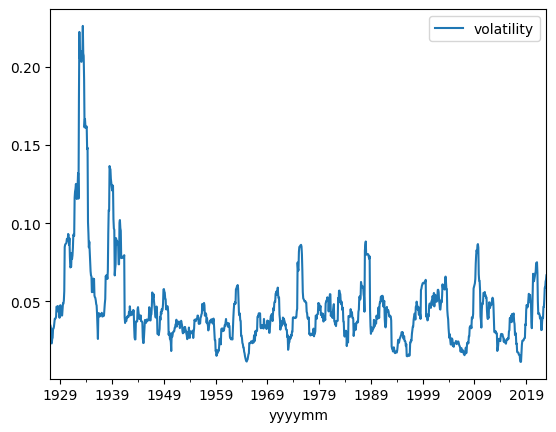

In [ ]:
data[['volatility']].plot()

In [ ]:
# percentage of the data used to train in a time-series split
training_percentage = 0.9

# number of samples, number of training samples, number of years in training set, number of years in testing set
data.shape[0], round(data.shape[0]* training_percentage), round(data.shape[0]* training_percentage) / 12, (data.shape[0] - round(data.shape[0]* training_percentage)) / 12

(1151, 1036, 86.33333333333333, 9.583333333333334)

In [ ]:
# split data sample into (X_{t-1}, Y_t)
X = data.drop(columns=['volatility'])
Y = data[['volatility']]

# split (X_{t-1}, Y_t) into time-series training and testing sets
X_train = X.iloc[0: round(data.shape[0]* training_percentage)]
X_test = X.iloc[round(data.shape[0]* training_percentage):]

Y_train = Y.iloc[0: round(data.shape[0]* training_percentage)]
Y_test = Y.iloc[round(data.shape[0]* training_percentage):]

##########################################################################################
##########################################################################################
##########################################################################################

X_sub_train = X_train.iloc[0: round(X_train.shape[0]* training_percentage)]
Y_sub_train = Y_train.iloc[0: round(X_train.shape[0]* training_percentage)]

X_validation = X_train.iloc[round(X_train.shape[0]* training_percentage):]
Y_validation = Y_train.iloc[round(X_train.shape[0]* training_percentage):]



## NOTE: in practice, you would do rolling predictions where you build a sequence of models, rather than just a single model at a single time-series split.

$\rule{800pt}{20pt}$

# Question 1: Build At Least FIVE Different Dense Neural Networks to Predict Volatility


- This focus of this question focuses on model architecture:

  - does a shallow, deep, wide, narrow, etc. model work best?

- You should test on the validation data and report your results about which architecture performed best.

- What periods of time does your model perform well in, and when does it perform poorly? Were they times of financial market stress?

In [ ]:
pd.DataFrame(Y_sub_train).hist()

NameError: name 'Y_sub_train' is not defined

## Extra-Practice Question: You Do NOT Need to Complete this Question

- For this question, you will need to do a little research on your own to use a new type of layer.

- Answer the same questions from Question 1 above, except you should use <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM">LSTM layers</a>.
  
  - A suggestion is to use half the layer size from your above approach.
  
- Compare with dense layers and explain which model performs best.

$\rule{800pt}{20pt}$

# Question 2: Tune Your Hyperparameters

- This question focuses on using Keras Tuner to find the right set of hyperparameters.

- You should use at least two different Keras Tuner search methods such as the <b>Random Search Tuner</b> and the <b>Bayesian Optimization Tuner</b>.

- You should try to tune at least four different hyperparameters per search method.

  - These could include the number of layers, number of units per layer, the optimizer, the weight initialization, the activation functions, the normalization scheme, etc.

- Summarize your results and describe which search method performed better and what was the best performing model and top three models, as well as their hyperparameter choices.

## Extra-Practice Question: You Do NOT Need to Complete this Question

- This question will ask you to write a simple continuous integration and continuous development (CI/CD) for the model.

- Your code should build new models if the mean-squared error (MSE) of last 12 months is going above a particular level.

- In the event of the model performing poorly, as described in the previous sentence, you write code that retrains the model and continues with your predictions.

- The procedure is:

  1. First, train for first 30 years. This is your base model. You should use your best network from Question 1 above.

  2. Next, continue using this base model while recording the past 12 months rolling MSE. You should continue to check if the MSE goes above a particular threshold (of your choosing), and in the event that it does pass the threhold, you should retrain your model on the most recent data and continue using this model.
  
  3. Repeat this process for your entire sample of data and report metrics associated with this CI/CD experiment.

# Question 3: Build at Least TWO Different Neural Networks To Predict Volatility Using the Functional API

- This focus of this question is on model architecture:

  - these models should not be sequential models,

  - they should be ones where there is some branching and you could not use the Sequential API (see examples from the in-class notebook if you need help getting started).

- You should test on the validation data and report your results about which architecture performed best.


- **Not Required:** Feel free to try to tune some hyperparameters for your architectures.

$\rule{800pt}{20pt}$